<a href="https://colab.research.google.com/github/Mohawkins/Gasoline-Prices-Increase-CS-668-Capstone-Project/blob/main/U_S__Natural_Gas_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Increase Price of Gasoline
Monica Hawkins Pace Universty, NY, USA

# Reference
https://www.eia.gov/energyexplained/gasoline/price-fluctuations.php



# Introduction
Retail gasoline prices are mainly affected by crude oil prices and the amount of gasoline available to meet demand. Strong and increasing demand for gasoline and other petroleum products in the United States and the rest of the world can place intense pressure on available supplies.Gasoline prices tend to increase when the available gasoline supply decreases relative to real or expected gasoline demand or consumption. Gasoline prices can change rapidly if something disrupts crude oil supplies, refinery operations, or gasoline pipeline deliveries. Even when crude oil prices are stable, gasoline prices fluctuate because of seasonal changes in demand and in gasoline specifications.

# Business Problem Statement
Gasoline prices tend to rise during the spring and summer, while heating oil demand increases in the winter. This project aims to analyze how seasonal trends in refinery production and fuel consumption affect fuel prices throughout the year. By examining refinery output data, fuel price patterns, and seasonal demand, the goal is to determine whether adjusting refinery operations could help reduce price spikes and stabilize fuel costs during the winter season.

# Goal
To build a machine learning model that predicts gasoline price increases, particularly the extreme price surges that occur during the spring and summer seasons.

# Exploratory Data Analysis

## Import libraries and load data




I have downloaded the dataset from U.S. Natural Gas

Link for Dataset: https://www.eia.gov/dnav/ng/ng_pri_sum_dcu_nus_m.htm

**Reasoning**:
Import the necessary libraries and load the dataset into a pandas DataFrame.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/U.S._Natural_Gas_Prices.csv')

**Reasoning**:
Display the first few rows of the DataFrame to verify the data loading.



In [ ]:
display(df.head())

,Category,25-Feb,25-Mar,25-Apr,25-May,25-Jun,25-Jul,History
0,Wellhead Price eo NA NA NA NA NA,NaN,1973-2025,NaN,NaN,NaN,NaN,NaN
1,Imports Price eo,436.00,251,224,201.00,193,201.0,1989-2025
2,By Pipeline eo,436.00,251,2.2,201.00,192,201.0,1997-2025
3,Exports Price eo,6.65,6.66,6.32,5.48,562,576.0,1989-2025
4,By Pipeline eo,4.00,321,288,2.66,278,292.0,1997-2025


## Basic dataframe description

### Subtask:
Display the head, info, and description of the DataFrame to get a basic understanding of the data.


**Reasoning**:
Display the head, info, and description of the DataFrame to understand its structure and content.



In [ ]:
display(df.head())
display(df.info())
display(df.describe())

,Category,25-Feb,25-Mar,25-Apr,25-May,25-Jun,25-Jul,History
0,Wellhead Price eo NA NA NA NA NA,NaN,1973-2025,NaN,NaN,NaN,NaN,NaN
1,Imports Price eo,436.00,251,224,201.00,193,201.0,1989-2025
2,By Pipeline eo,436.00,251,2.2,201.00,192,201.0,1997-2025
3,Exports Price eo,6.65,6.66,6.32,5.48,562,576.0,1989-2025
4,By Pipeline eo,4.00,321,288,2.66,278,292.0,1997-2025


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  12 non-null     object 
 1   25-Feb    11 non-null     float64
 2   25-Mar    12 non-null     object 
 3   25-Apr    11 non-null     object 
 4   25-May    9 non-null      float64
 5   25-Jun    9 non-null      object 
 6   25-Jul    8 non-null      float64
 7   History   8 non-null      object 
dtypes: float64(3), object(5)
memory usage: 900.0+ bytes


None

,25-Feb,25-May,25-Jul
count,11.000000,9.000000,8.000000
mean,303.422727,257.412222,327.033750
std,285.884083,324.718917,183.421834
min,4.000000,2.660000,25.270000
25%,9.785000,5.480000,201.000000
50%,436.000000,201.000000,329.000000
75%,516.000000,451.000000,459.250000
max,762.000000,970.000000,576.000000


## Graphs analysis

### Subtask:
Create relevant plots (e.g., time series plot of natural gas prices) to visualize the data and identify trends.


**Reasoning**:
Examine the output of df.info() and df.describe() to identify columns that contain numerical data representing prices over time. Pay attention to columns that were identified as object type in the previous step but might represent numerical values that need to be converted.



In [ ]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  12 non-null     object 
 1   25-Feb    11 non-null     float64
 2   25-Mar    12 non-null     object 
 3   25-Apr    11 non-null     object 
 4   25-May    9 non-null      float64
 5   25-Jun    9 non-null      object 
 6   25-Jul    8 non-null      float64
 7   History   8 non-null      object 
dtypes: float64(3), object(5)
memory usage: 900.0+ bytes


None

,25-Feb,25-May,25-Jul
count,11.000000,9.000000,8.000000
mean,303.422727,257.412222,327.033750
std,285.884083,324.718917,183.421834
min,4.000000,2.660000,25.270000
25%,9.785000,5.480000,201.000000
50%,436.000000,201.000000,329.000000
75%,516.000000,451.000000,459.250000
max,762.000000,970.000000,576.000000


**Reasoning**:
Based on the df.info() and df.describe() output, the columns '25-Feb', '25-May', and '25-Jul' are already float64, and columns '25-Mar', '25-Apr', and '25-Jun' are object type, but likely contain numerical price data. I will attempt to convert these object columns to numeric, coercing errors to NaN. Then, I will select all the date-like columns that contain numerical data and plot them as time series.



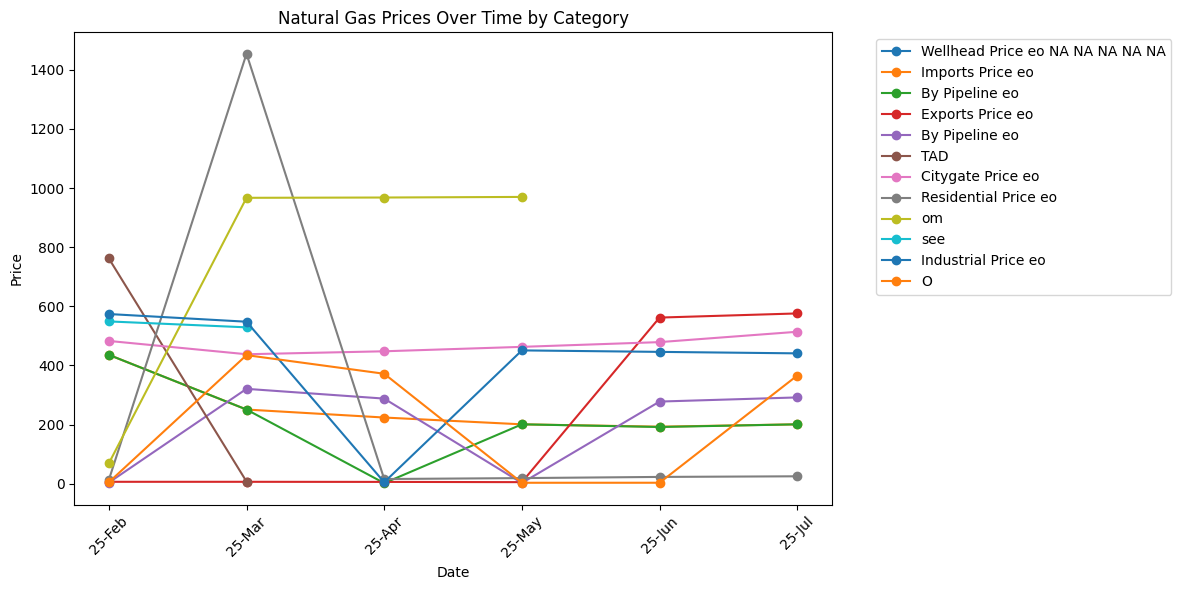

In [ ]:
date_columns = ['25-Feb', '25-Mar', '25-Apr', '25-May', '25-Jun', '25-Jul']

for col in date_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

plt.figure(figsize=(12, 6))
for index, row in df.iterrows():
    plt.plot(date_columns, row[date_columns], marker='o', linestyle='-', label=row['Category'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Natural Gas Prices Over Time by Category')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Heatmap

### Subtask:
Generate a heatmap to visualize the correlation matrix of numerical features.


**Reasoning**:
Select the numerical columns, calculate the correlation matrix, and generate a heatmap with annotations.



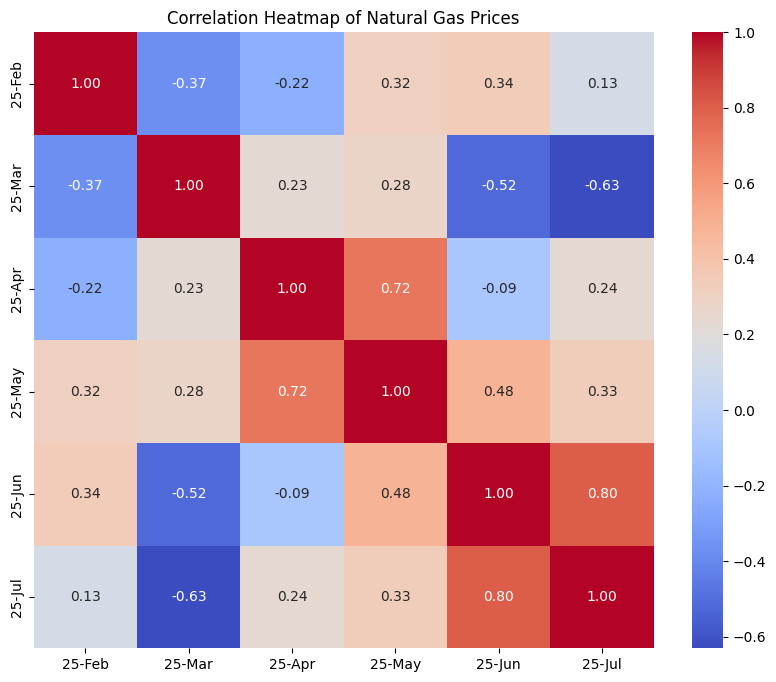

In [ ]:
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Natural Gas Prices')
plt.show()

## Pairplot

### Subtask:
Create a pairplot to visualize the relationships between pairs of numerical features.


**Reasoning**:
Generate a pairplot to visualize the relationships between pairs of numerical features and add a title.



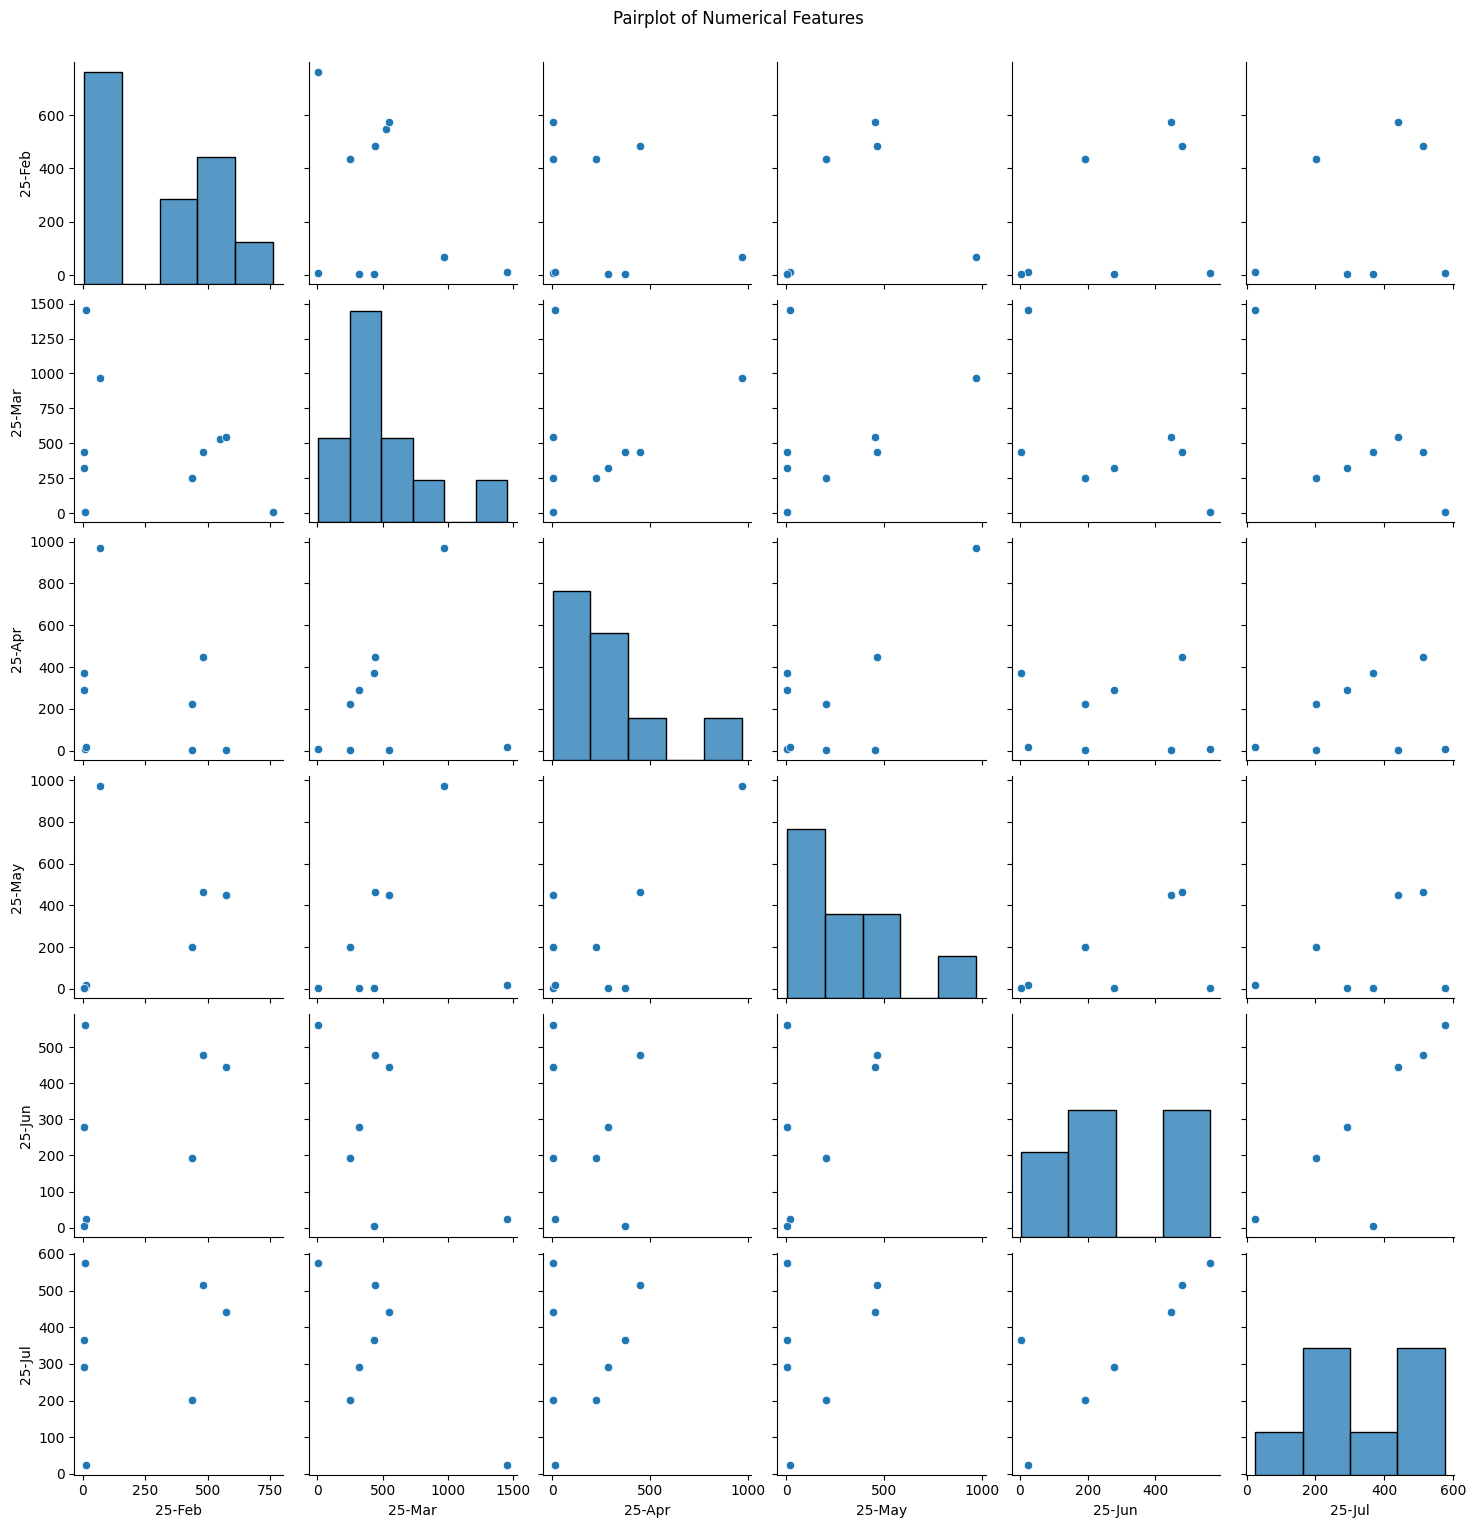

In [ ]:
sns.pairplot(numerical_df)
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

## Melt dataframe

### Subtask:
If necessary for specific visualizations or analysis, melt the DataFrame to a long format.


**Reasoning**:
Melt the DataFrame to a long format for easier plotting and analysis of time series data.



In [ ]:
df_melted = pd.melt(df, id_vars=['Category'], var_name='Date', value_name='Price')
display(df_melted.head())

,Category,Date,Price
0,Wellhead Price eo NA NA NA NA NA,25-Feb,NaN
1,Imports Price eo,25-Feb,436.0
2,By Pipeline eo,25-Feb,436.0
3,Exports Price eo,25-Feb,6.65
4,By Pipeline eo,25-Feb,4.0


## Import predictive models, metrics, and preprocessing modules

### Subtask:
Import necessary modules from libraries like scikit-learn for potential future modeling steps.


**Reasoning**:
Import the necessary modules from scikit-learn for potential machine learning modeling, metrics, and preprocessing, grouping related imports into a single code block.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

## Summary:

### Data Analysis Key Findings

*   The dataset contains U.S. Natural Gas Prices with a 'Category' column and several columns representing dates ('25-Feb', '25-Mar', '25-Apr', '25-May', '25-Jun', '25-Jul').
*   Initially, several date columns ('25-Mar', '25-Apr', '25-Jun') were of object type and contained missing values, requiring conversion to numeric types for analysis.
*   The time series plot revealed trends in natural gas prices over the months from February to July for different categories.
*   The correlation heatmap showed the correlation coefficients between the numerical price columns, providing insights into how prices across different months relate to each other.
*   The pairplot visualized the pairwise relationships and distributions of the numerical price features.
*   The DataFrame was successfully melted into a long format with 'Category', 'Date', and 'Price' columns, which is suitable for time series analysis and visualization.

### Insights or Next Steps

*   The analysis so far focuses on natural gas prices, while the project goal is to predict gasoline price increases. The provided data is for natural gas, which may not be directly applicable to predicting gasoline prices. Future steps should involve obtaining and analyzing relevant gasoline price data.
*   While preprocessing and model import steps were initiated, actual model building and training are needed to achieve the project's goal of predicting price increases.
